## StackOverflow Survey Data analysis


In this notebook, I will go through a comparison of some [data from StackOverflow surveys](https://insights.stackoverflow.com/survey/), for the years from 2013 to 2020.

The analiysis will follow the **CRISP-DM** (Cross Industry Process for Data Mining) approach, identifying 6 steps:

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**

### 1 - Business Understanding

According to the CRISP-DM definition, this is the section that introduces the question of interest, claryfying what are we trying to achieve through data.

In this case, my intent was to: 

* Acquire some insights on the characteristics of a reference population of Software Developers;
* Identify some patterns that show the evolution of such characteristics through time;
* Provide some forecast for the future.

I was interested both in professional/technical aspects (education, technology) and demographic ones (gender, country, ethnicity). As a matter of fact, I found the demographic data quite revealing, and decided to build a simple model to provide a future forecast for that.

### 2 - Data Understanding

The purpose of this section is to introduce the data source to be used for the analysis, and clarify whether or not they are covering enough scope to answer the question of interest.

As mentioned at the very beginning, as a source here I'm using the [StackOverflow annual surveys](https://insights.stackoverflow.com/survey/).

Through the last decade or so StackOverflow has presented its users with a survey to better understand them. Given the popularity of the forum, I thought this was a good place where to look to identify change patterns in the characteristics of a SW developer. I foucused on the years from 2013 to 2020.

**Note**: looking at this from a **data science process** perspective, this section covers mainly the _gather_ and _assess_ parts.

First, let's read in the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

Then, let's read in the data for the various years as DataFrames. **Note:** The paths to the file will have to be changed accordingly to the users's local setup. 

You can see that the files have different name formats and that some require some adjustments in loading, forcing the data type to be a `string` to avoid error messages and misrepresentations.

In [2]:
# Change data file path as needed
df_13 = pd.read_csv('./data/stack_overflow_2013/2013 Stack Overflow Survey Responses.csv',dtype='string') # 2013
df_14 = pd.read_csv('./data/stack_overflow_2014/2014 Stack Overflow Survey Responses.csv') # 2014
df_15 = pd.read_csv('./data/stack_overflow_2015/2015 Stack Overflow Developer Survey Responses.csv',dtype='string') # 2015
df_16 = pd.read_csv('./data/stack_overflow_2016/2016 Stack Overflow Survey Responses.csv') # 2016
df_17 = pd.read_csv('./data/stack_overflow_2017/survey_results_public.csv') # 2017
df_18 = pd.read_csv('./data/stack_overflow_2018/survey_results_public.csv',dtype='string') # 2018
df_19 = pd.read_csv('./data/stack_overflow_2019/survey_results_public.csv') # 2019
df_20 = pd.read_csv('./data/stack_overflow_2020/survey_results_public.csv') # 2020

Some further cleaning is needed for some of the years. Namely:

* 2013, 2014 files present no information in the first row
* 2015 file has the name of the columns in the first row, while the column's name is meaningless.

You can uncomment any of the rows in the following cell to check this out, or proceed directly to the next one.

In [3]:
# Uncomment to check data for 2013/14/15
# df_13.head()
# df_14.head()
# df_15.head()

In [4]:
# Remove meaningless rows 2013/14/15
# 2013, 2014 - get rid of first row
df_13.drop(0, inplace = True)
df_14.drop(0, inplace = True)

# 2015 - rename columns and get rid of first row
col_names_dict = {}

for col in df_15.columns:
    col_names_dict[col] = df_15[col][0]

df_15.rename(columns = col_names_dict, inplace = True)
df_15.drop(0, inplace = True)

You can use the next cell to take a look at the final datasets, their columns etc.

In [5]:
# Look at any df you like
# df_13.head()
# df_20.tail()

# See details of the columns available
# for col in df_13.columns:
#     print(col)

Once loaded all the data, let's take a look at the # of rows and columns for the various years, to have a sense of the number of partecipants and questions asked:

In [6]:
num_rows_13 = df_13.shape[0] # rows, 2013
num_cols_13 = df_13.shape[1] # columns, 2013

num_rows_14 = df_14.shape[0] # rows, 2014
num_cols_14 = df_14.shape[1] # columns, 2014

num_rows_15 = df_15.shape[0] # rows, 2015
num_cols_15 = df_15.shape[1] # columns, 2015

num_rows_16 = df_16.shape[0] # rows, 2016
num_cols_16 = df_16.shape[1] # columns, 2016

num_rows_17 = df_17.shape[0] # rows, 2017
num_cols_17 = df_17.shape[1] # columns, 2017

num_rows_18 = df_18.shape[0] # rows, 2018
num_cols_18 = df_18.shape[1] # columns, 2018

num_rows_19 = df_19.shape[0] # rows, 2019
num_cols_19 = df_19.shape[1] # columns, 2019

num_rows_20 = df_20.shape[0] # rows, 2020
num_cols_20 = df_20.shape[1] # columns, 2020

print("Year 2013 - Rows in the dataset: ", num_rows_13, "; Colums in the dataset: ", num_cols_13)
print("Year 2014 - Rows in the dataset: ", num_rows_14, "; Colums in the dataset: ", num_cols_14)
print("Year 2015 - Rows in the dataset: ", num_rows_15, "; Colums in the dataset: ", num_cols_15)
print("Year 2016 - Rows in the dataset: ", num_rows_16, "; Colums in the dataset: ", num_cols_16)
print("Year 2017 - Rows in the dataset: ", num_rows_17, "; Colums in the dataset: ", num_cols_17)
print("Year 2018 - Rows in the dataset: ", num_rows_18, "; Colums in the dataset: ", num_cols_18)
print("Year 2019 - Rows in the dataset: ", num_rows_19, "; Colums in the dataset: ", num_cols_19)
print("Year 2020 - Rows in the dataset: ", num_rows_20, "; Colums in the dataset: ", num_cols_20)

Year 2013 - Rows in the dataset:  9742 ; Colums in the dataset:  128
Year 2014 - Rows in the dataset:  7643 ; Colums in the dataset:  120
Year 2015 - Rows in the dataset:  26086 ; Colums in the dataset:  222
Year 2016 - Rows in the dataset:  56030 ; Colums in the dataset:  66
Year 2017 - Rows in the dataset:  51392 ; Colums in the dataset:  154
Year 2018 - Rows in the dataset:  98855 ; Colums in the dataset:  129
Year 2019 - Rows in the dataset:  88883 ; Colums in the dataset:  85
Year 2020 - Rows in the dataset:  64461 ; Colums in the dataset:  61


It seems that the number of respondents has grown with time, while the number of questions is reducing. 
We can plot the size of the population vs. the year:

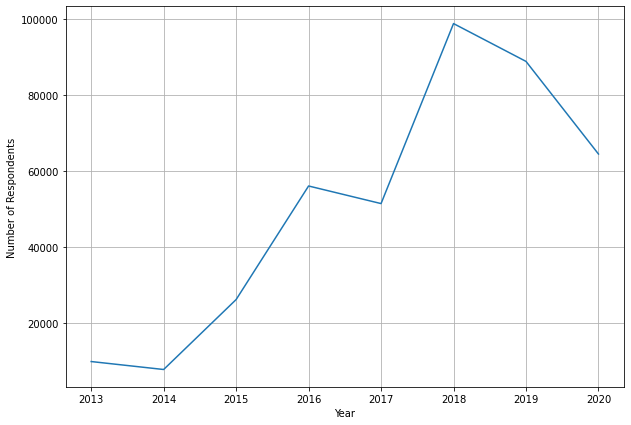

In [7]:
# Group size info together and plot
df_sample_size = pd.DataFrame({'Respondents': [num_rows_13, num_rows_14, num_rows_15, num_rows_16, num_rows_17, num_rows_18, num_rows_19, num_rows_20],
                             'Questions': [num_cols_13, num_cols_14, num_cols_15, num_cols_16, num_cols_17, num_cols_18, num_cols_19, num_cols_20]},
                              index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

df_sample_size.Respondents.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Number of Respondents');

As an indication of how effective the questions where, we can take a look at the percentage of `null` 

In [8]:
null_per_13 = df_13.isnull().sum().sum()/(num_rows_13*num_cols_13)
null_per_14 = df_14.isnull().sum().sum()/(num_rows_14*num_cols_14)
null_per_15 = df_15.isnull().sum().sum()/(num_rows_15*num_cols_15)
null_per_16 = df_16.isnull().sum().sum()/(num_rows_16*num_cols_16)
null_per_17 = df_17.isnull().sum().sum()/(num_rows_17*num_cols_17)
null_per_18 = df_18.isnull().sum().sum()/(num_rows_18*num_cols_18)
null_per_19 = df_19.isnull().sum().sum()/(num_rows_19*num_cols_19)
null_per_20 = df_20.isnull().sum().sum()/(num_rows_20*num_cols_20)

print ("Year 2013 - Percentage of Null: ", "{:.2f}".format(null_per_13*100), "%")
print ("Year 2014 - Percentage of Null: ", "{:.2f}".format(null_per_14*100), "%")
print ("Year 2015 - Percentage of Null: ", "{:.2f}".format(null_per_15*100), "%")
print ("Year 2016 - Percentage of Null: ", "{:.2f}".format(null_per_16*100), "%")
print ("Year 2017 - Percentage of Null: ", "{:.2f}".format(null_per_17*100), "%")
print ("Year 2018 - Percentage of Null: ", "{:.2f}".format(null_per_18*100), "%")
print ("Year 2019 - Percentage of Null: ", "{:.2f}".format(null_per_19*100), "%")
print ("Year 2020 - Percentage of Null: ", "{:.2f}".format(null_per_20*100), "%")

Year 2013 - Percentage of Null:  59.80 %
Year 2014 - Percentage of Null:  54.01 %
Year 2015 - Percentage of Null:  77.86 %
Year 2016 - Percentage of Null:  18.94 %
Year 2017 - Percentage of Null:  45.32 %
Year 2018 - Percentage of Null:  34.11 %
Year 2019 - Percentage of Null:  13.62 %
Year 2020 - Percentage of Null:  23.11 %


It can be seen that the percentages of `null` was higher in the first years. However, a better look at the dataframes would also show that their structure is different, with the answer to some questions distributed to more than one column.

In the end, for the analysis of technical/professional aspects I decided to focus on the years from 2016/17 onwards given that they seem to present the more detailed information, and more consistency in the format. For the demographic data I will make use of the full data pool.

### 3 - Data Preparation

This will be the section where some data subset are extracted from the original dataframes, eventually further manipulated and then compared to identify existing patterns. From a **data science process** perspective, this section will cover mostly the _clean_ and _visualize_ steps.

I will separate the technical from the demographic caratcteristics.

#### 3.a - Technical/Professional Characteristics

As a first step, I'll look into the **professional categories** (Professional Developer, Student etc.), to see if/how they change with time. For this part I'll use data from 2017 to 2020.


In [9]:
# Extract columns with data about the professional status
# NOTE: title of the column containing professional information changed from 2017 to 2020
status_vals_17 = df_17.Professional.value_counts() #2017
# Data in 2018 do not seem to include this information, even if it was asked to the respondent
status_vals_19 = df_19.MainBranch.value_counts() #2019
status_vals_20 = df_20.MainBranch.value_counts() #2020

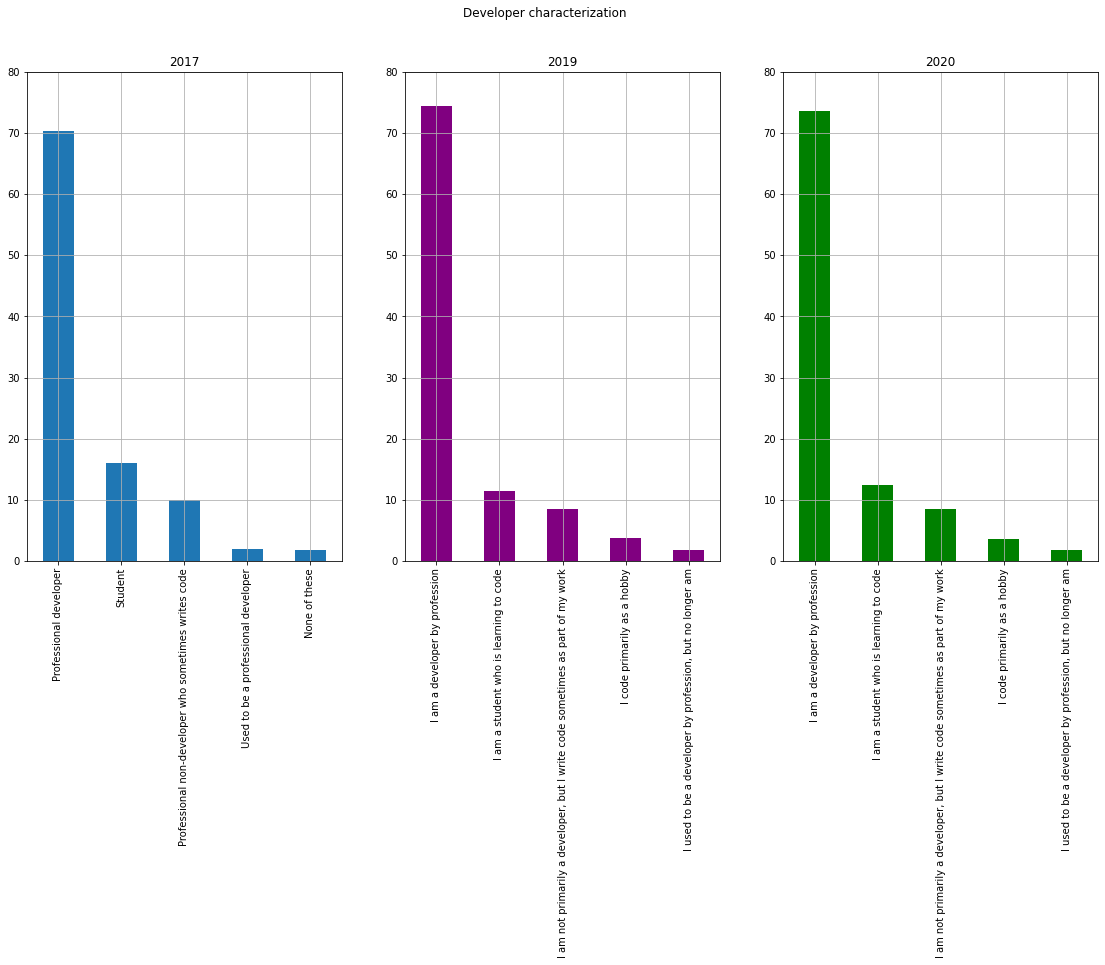

In [10]:
# Bar chart of the proportion of individuals in each professional category 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
fig.suptitle("Developer characterization")
fig.set_figheight(9) 
fig.set_figwidth(19.2)

# Percentages are calculated with respect to the non-null answers
(status_vals_17/(num_rows_17 - df_17.Professional.isnull().sum())*100).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 80])
ax1.grid()

(status_vals_19/(num_rows_19 - df_19.MainBranch.isnull().sum())*100).plot(ax=ax2, kind="bar", color="purple")
ax2.set_title("2019")
ax2.set_ylim([0, 80])
ax2.grid()

(status_vals_20/(num_rows_20 - df_20.MainBranch.isnull().sum())*100).plot(ax=ax3, kind="bar", color="green")
ax3.set_title("2020")
ax3.set_ylim([0, 80])
ax3.grid();

The distribution of answers seems consitent in indicating a significant majority of professional developers, followed by students. These two categories always cover more than 80% of the total.

Another characteristics I thought worth looking in was the **formal education** of the Respondent. 

In [11]:
# Extract columns with data about the education level
# NOTE: title of the column containing formal education information changed from 2017 to 2020
ed_vals_17 = df_17.FormalEducation.value_counts() #2017
ed_vals_18 = df_18.FormalEducation.value_counts() #2018
ed_vals_19 = df_19.EdLevel.value_counts() #2018
ed_vals_20 = df_20.EdLevel.value_counts() #2020

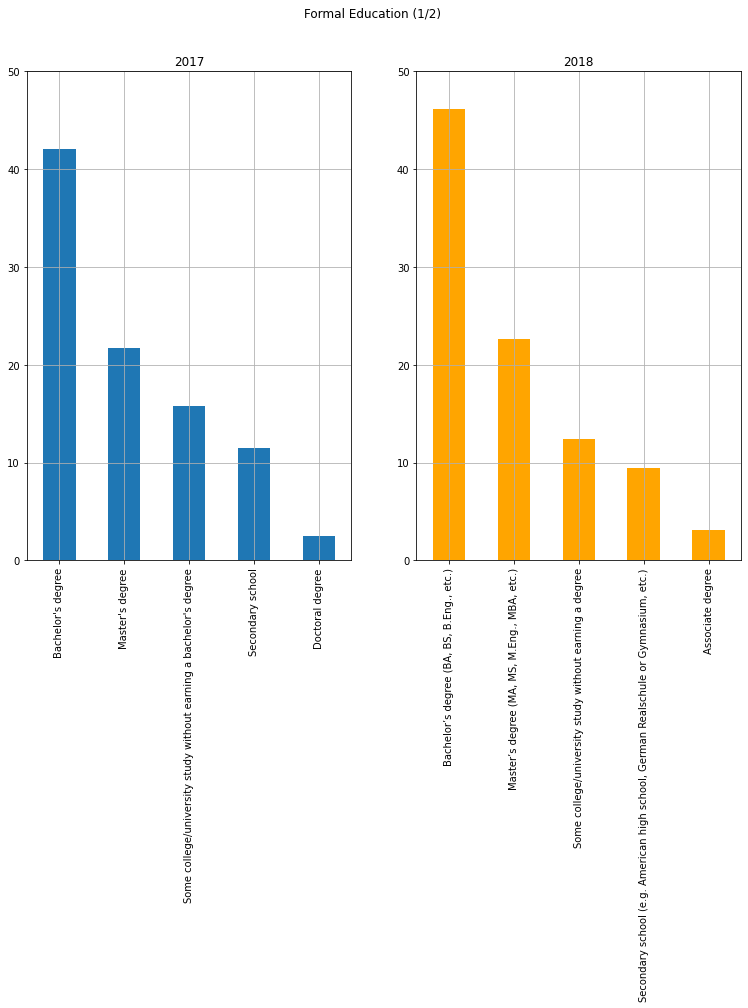

In [12]:
# Bar chart of the proportion of individuals in ed_vals
# Split in 2 figures for readibility of the labels
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Formal Education (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(12.8)

# Percentages are calculated with respect to the non-null answers
(ed_vals_17[:5]/(num_rows_17 - df_17.FormalEducation.isnull().sum())*100).plot(ax=ax1, kind="bar");
ax1.set_title("2017")
ax1.set_ylim([0, 50])
ax1.grid()

(ed_vals_18[:5]/(num_rows_18 - df_18.FormalEducation.isnull().sum())*100).plot(ax=ax2, kind="bar", color = "orange");
ax2.set_title("2018")
ax2.set_ylim([0, 50])
ax2.grid();

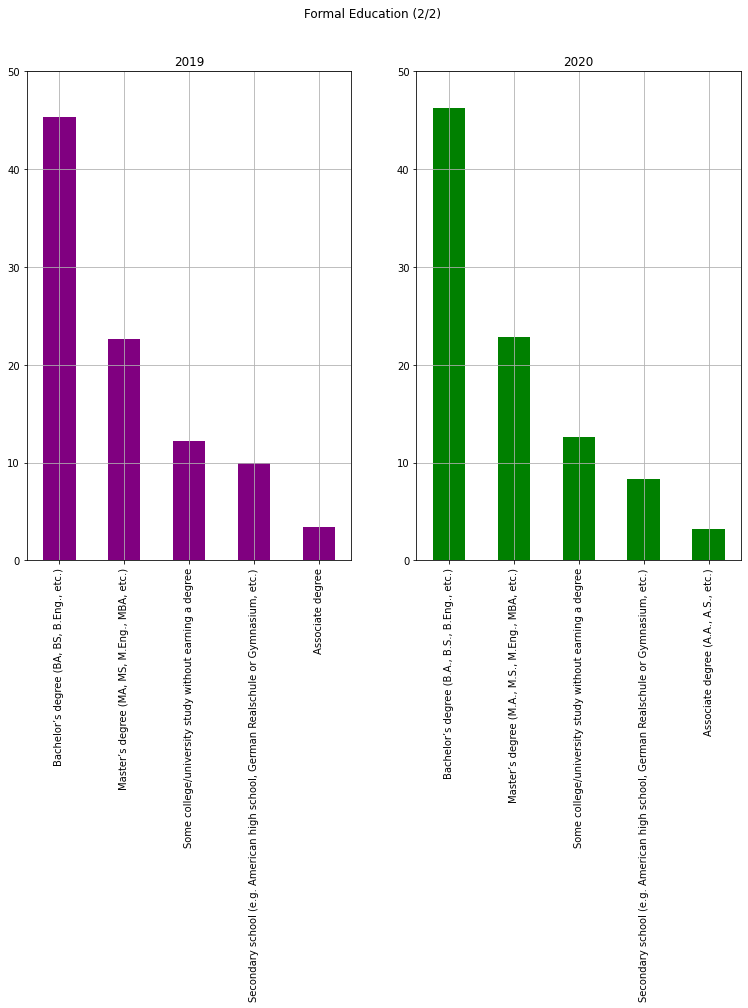

In [13]:
# Split in 2 figures for readibility of the labels
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle("Formal Education (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(12.8)

# Percentages are calculated with respect to the non-null answers
(ed_vals_19[:5]/(num_rows_19 - df_19.EdLevel.isnull().sum())*100).plot(ax=ax3, kind="bar", color = "purple");
ax3.set_title("2019")
ax3.set_ylim([0, 50])
ax3.grid();

(ed_vals_20[:5]/(num_rows_20 - df_20.EdLevel.isnull().sum())*100).plot(ax=ax4, kind="bar", color = "green");
ax4.set_title("2020")
ax4.set_ylim([0, 50])
ax4.grid();

The distributions in this case seem more diluted, but the combination of Bachelor and Master degrees always covers more than 60% of the populuation, followed by a more diverse kind of education.

Finally, let's take a look at **technologies** (languages used/languages wanted). 
For this, some further processing is needed given how the data is collected.

I will focus on the years from 2016 to 2020, that present some commonality in format, with all the answers to similar questions ("What technology have you used in the past year"/"What technology would you like to use in the next year")  grouped in a single column. However, the content of the column will have to be parsed to split the various items composing the answer.

For example, a respondent might answer "C++; Java; SQL", and we'll have to correctly identify and count one occurrence each of "C++", "Java", SQL". For this I'll use the following function.

In [14]:
# Function to be used to parse the content on the various columns
def total_count(df, col1, col2, separator):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    separator - separator between strings (comma, semicolon etc.)

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    items_list - a list of the different items that were identified parsing the dataframe
    '''
    new_df = defaultdict(int)
    items_list = [] 

    # loop through rows
    for idx in range(df.shape[0]):
        # Split the string to separate the various languages used by the responder (if > 1)
        langs = df[col1][idx].split(separator)
        # Loop in the list of items
        for idy in range(len(langs)):
            # Update counts in the dataframe
            val = langs[idy]
            new_df[val] += int(df[col2][idx])
            # If not detected before update list            
            if (not(val in items_list)):
                items_list.append(val)
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df, items_list

Let's start with the **most used languages**

In [15]:
# Extract columns with data about the language/technology used
# NOTE: title of the column containing formal education information changed from 2016 to 2020
lang_used_16 = df_16.tech_do.value_counts() #2016
lang_used_17 = df_17.HaveWorkedLanguage.value_counts() #2017
lang_used_18 = df_18.LanguageWorkedWith.value_counts() #2018
lang_used_19 = df_19.LanguageWorkedWith.value_counts() #2019
lang_used_20 = df_20.LanguageWorkedWith.value_counts() #2020

In [16]:
# Reset data frames
lu_16 = lang_used_16.reset_index()
lu_17 = lang_used_17.reset_index()
lu_18 = lang_used_18.reset_index()
lu_19 = lang_used_19.reset_index()
lu_20 = lang_used_20.reset_index()

In [17]:
# Rename columns
lu_16.rename(columns={'index': 'language', 'tech_do': 'count'}, inplace=True)
lu_17.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
lu_18.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_19.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_20.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [18]:
# Parse, separate and count the content of the columns
lu_16_df, worked_languages_16 = total_count(lu_16, 'language', 'count', '; ') # NOTE: separator for 2016 requires a space
lu_17_df, worked_languages_17 = total_count(lu_17, 'language', 'count', '; ') # NOTE: separator for 2017 requires a space
lu_18_df, worked_languages_18 = total_count(lu_18, 'language', 'count', ';')
lu_19_df, worked_languages_19 = total_count(lu_19, 'language', 'count', ';')
lu_20_df, worked_languages_20 = total_count(lu_20, 'language', 'count', ';')

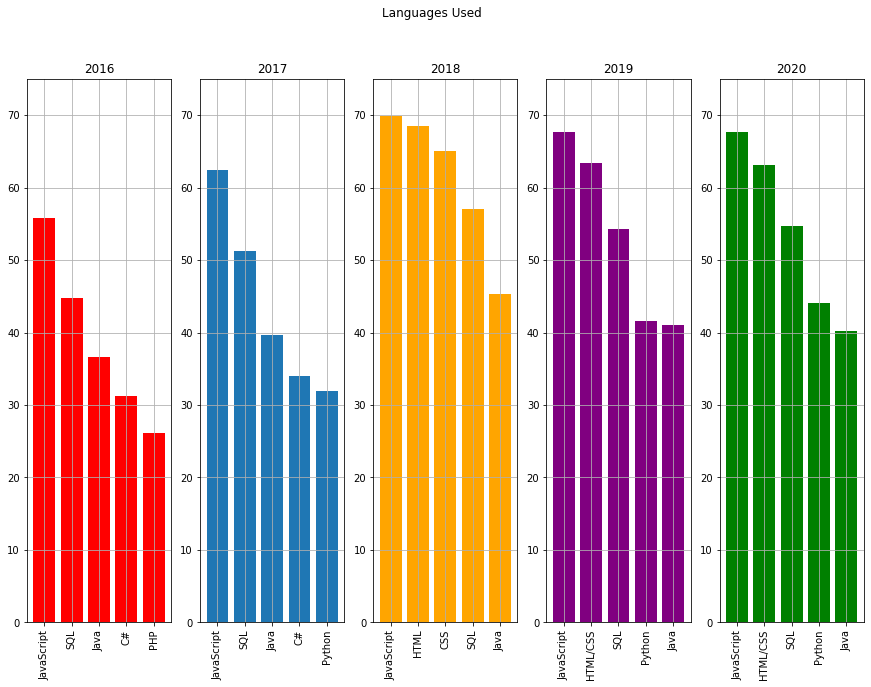

In [19]:
# Bar chart of the proportion of the top 5 languages/combinations for the individuals in count_vals
fig, axes = plt.subplots(1, 5)
fig.suptitle("Languages Used")
fig.set_figheight(10) 
fig.set_figwidth(15)

# Percentages are calculated with respect to the non-null answers
axes[0].bar(lu_16_df[:5]['language'].to_list(), (lu_16_df[:5]['count'].to_list()
        /(num_rows_16 - df_16.tech_do.isnull().sum()))*100, color = "red")
axes[0].tick_params('x', labelrotation=90)
axes[0].set_title("2016")
axes[0].set_ylim([0, 75])
axes[0].grid()

axes[1].bar(lu_17_df[:5]['language'].to_list(), (lu_17_df[:5]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))*100)
axes[1].tick_params('x', labelrotation=90)
axes[1].set_title("2017")
axes[1].set_ylim([0, 75])
axes[1].grid()

axes[2].bar(lu_18_df[:5]['language'].to_list(), (lu_18_df[:5]['count'].to_list()
        /(num_rows_18 - df_18.LanguageWorkedWith.isnull().sum()))*100, color = "orange")
axes[2].tick_params('x', labelrotation=90)
axes[2].set_title("2018")
axes[2].set_ylim([0, 75])
axes[2].grid()

axes[3].bar(lu_19_df[:5]['language'].to_list(), (lu_19_df[:5]['count'].to_list()
        /(num_rows_19 - df_19.LanguageWorkedWith.isnull().sum()))*100, color = "purple")
axes[3].tick_params('x', labelrotation=90)
axes[3].set_title("2019")
axes[3].set_ylim([0, 75])
axes[3].grid()

axes[4].bar(lu_20_df[:5]['language'].to_list(), (lu_20_df[:5]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()))*100, color = "green")
axes[4].tick_params('x', labelrotation=90)
axes[4].set_title("2020")
axes[4].set_ylim([0, 75])
axes[4].grid();

From this plot it’s clear that JavaScript and SQL are a consistent presence in the lives of the respondents, and we can also see how Python seems to gain some traction.

Now let's look at the **languages people want to use**:

In [20]:
# Extract columns with data about the language/technology wanted
# NOTE: title of the column containing formal education information changed from 2016 to 2020
lang_wanted_16 = df_16.tech_want.value_counts() #2016
lang_wanted_17 = df_17.WantWorkLanguage.value_counts() #2017
lang_wanted_18 = df_18.LanguageDesireNextYear.value_counts() #2018
lang_wanted_19 = df_19.LanguageDesireNextYear.value_counts() #2019
lang_wanted_20 = df_20.LanguageDesireNextYear.value_counts() #2020

In [21]:
# Reset data frames
lw_16 = lang_wanted_16.reset_index()
lw_17 = lang_wanted_17.reset_index()
lw_18 = lang_wanted_18.reset_index()
lw_19 = lang_wanted_19.reset_index()
lw_20 = lang_wanted_20.reset_index()

In [22]:
# Rename columns
lw_16.rename(columns={'index': 'language', 'tech_want': 'count'}, inplace=True)
lw_17.rename(columns={'index': 'language', 'WantWorkLanguage': 'count'}, inplace=True)
lw_18.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_19.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_20.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [23]:
# Parse, separate and count the content of the columns
lw_16_df, wanted_languages_16 = total_count(lw_16, 'language', 'count', '; ') # NOTE: separator for 2016 requires a space
lw_17_df, wanted_languages_17 = total_count(lw_17, 'language', 'count', '; ') # NOTE: separator for 2017 requires a space
lw_18_df, wanted_languages_18 = total_count(lw_18, 'language', 'count', ';')
lw_19_df, wanted_languages_19 = total_count(lw_19, 'language', 'count', ';')
lw_20_df, wanted_languages_20 = total_count(lw_20, 'language', 'count', ';')

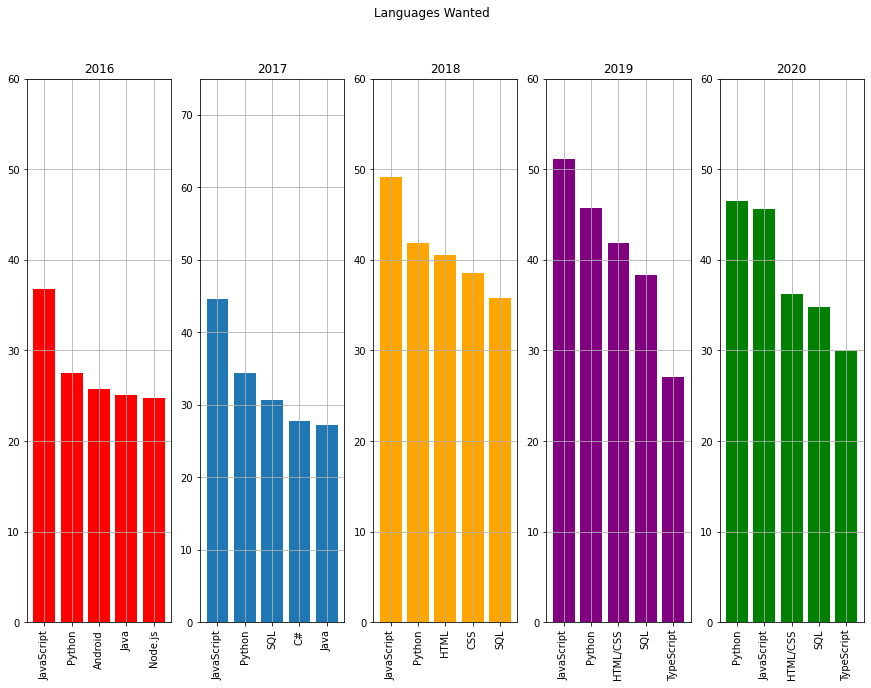

In [24]:
# Bar chart of the proportion of the top 5 languages/combinations for the individuals in count_vals
fig, axes = plt.subplots(1, 5)
fig.suptitle("Languages Wanted")
fig.set_figheight(10) 
fig.set_figwidth(15)

# Percentages are calculated with respect to the non-null answers
axes[0].bar(lw_16_df[:5]['language'].to_list(), (lw_16_df[:5]['count'].to_list()
        /(num_rows_16 - df_16.tech_do.isnull().sum()))*100, color = "red")
axes[0].tick_params('x', labelrotation=90)
axes[0].set_title("2016")
axes[0].set_ylim([0, 60])
axes[0].grid()

axes[1].bar(lw_17_df[:5]['language'].to_list(), (lw_17_df[:5]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))*100)
axes[1].tick_params('x', labelrotation=90)
axes[1].set_title("2017")
axes[1].set_ylim([0, 75])
axes[1].grid()

axes[2].bar(lw_18_df[:5]['language'].to_list(), (lw_18_df[:5]['count'].to_list()
        /(num_rows_18 - df_18.LanguageWorkedWith.isnull().sum()))*100, color = "orange")
axes[2].tick_params('x', labelrotation=90)
axes[2].set_title("2018")
axes[2].set_ylim([0, 60])
axes[2].grid()

axes[3].bar(lw_19_df[:5]['language'].to_list(), (lw_19_df[:5]['count'].to_list()
        /(num_rows_19 - df_19.LanguageWorkedWith.isnull().sum()))*100, color = "purple")
axes[3].tick_params('x', labelrotation=90)
axes[3].set_title("2019")
axes[3].set_ylim([0, 60])
axes[3].grid()

axes[4].bar(lw_20_df[:5]['language'].to_list(), (lw_20_df[:5]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()))*100, color = "green")
axes[4].tick_params('x', labelrotation=90)
axes[4].set_title("2020")
axes[4].set_ylim([0, 60])
axes[4].grid();

We can see a confirmation here of the fact that Python has been growing in use and benefits for a consistent popularity.

#### 3.b - Demographic/Non-Professional Characteristics

For this parte of the analysis I will consider also the datasets for 2013 to 2015.

Let's start with a look at the **Country** of the repondent

In [25]:
# Extract columns with data about the Country
# NOTE: title of the column containing Country information changed (slightly) from 2013 to 2020
count_vals_13 = df_13['What Country or Region do you live in?'].value_counts() #2013
count_vals_14 = df_14['What Country do you live in?'].value_counts() #2014
count_vals_15 = df_15.Country.value_counts() #2015
count_vals_16 = df_16.country.value_counts() #2016
count_vals_17 = df_17.Country.value_counts() #2017
count_vals_18 = df_18.Country.value_counts() #2018
count_vals_19 = df_19.Country.value_counts() #2019
count_vals_20 = df_20.Country.value_counts() #2020

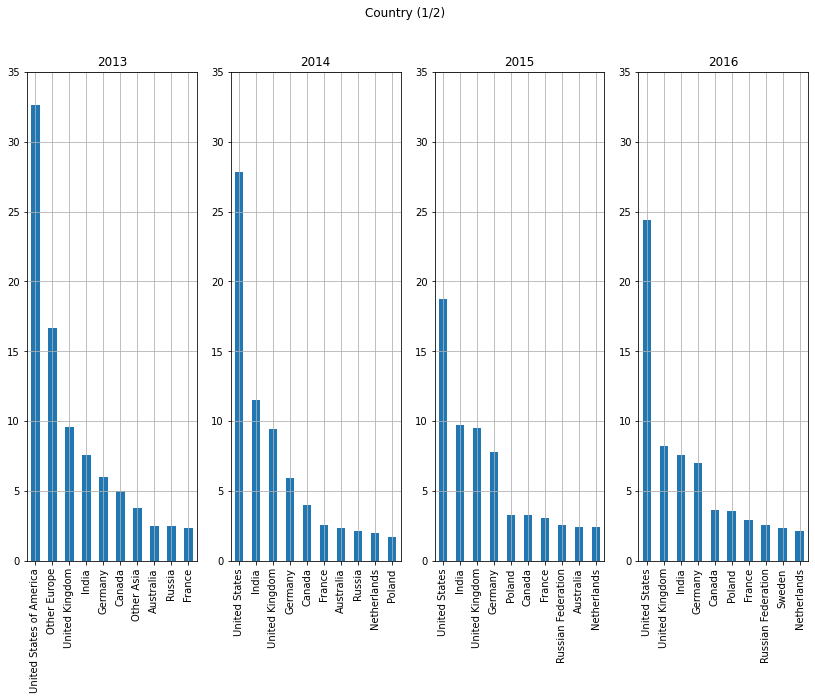

In [26]:
# Bar chart of the first 10 countries in count_vals
# Split in two to improve readability of labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Country (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

# Percentages are calculated with respect to the non-null answers
(count_vals_13[:10]/(num_rows_13 - df_13['What Country or Region do you live in?'].isnull().sum())*100).plot(ax=ax1, kind="bar")
ax1.set_title("2013")
ax1.set_ylim([0, 35])
ax1.grid()

(count_vals_14[:10]/(num_rows_14 - df_14['What Country do you live in?'].isnull().sum())*100).plot(ax=ax2, kind="bar")
ax2.set_title("2014")
ax2.set_ylim([0, 35])
ax2.grid()

(count_vals_15[:10]/(num_rows_15 - df_15.Country.isnull().sum())*100).plot(ax=ax3, kind="bar")
ax3.set_title("2015")
ax3.set_ylim([0, 35])
ax3.grid()

(count_vals_16[:10]/(num_rows_16 - df_16.country.isnull().sum())*100).plot(ax=ax4, kind="bar");
ax4.set_title("2016")
ax4.set_ylim([0, 35])
ax4.grid();

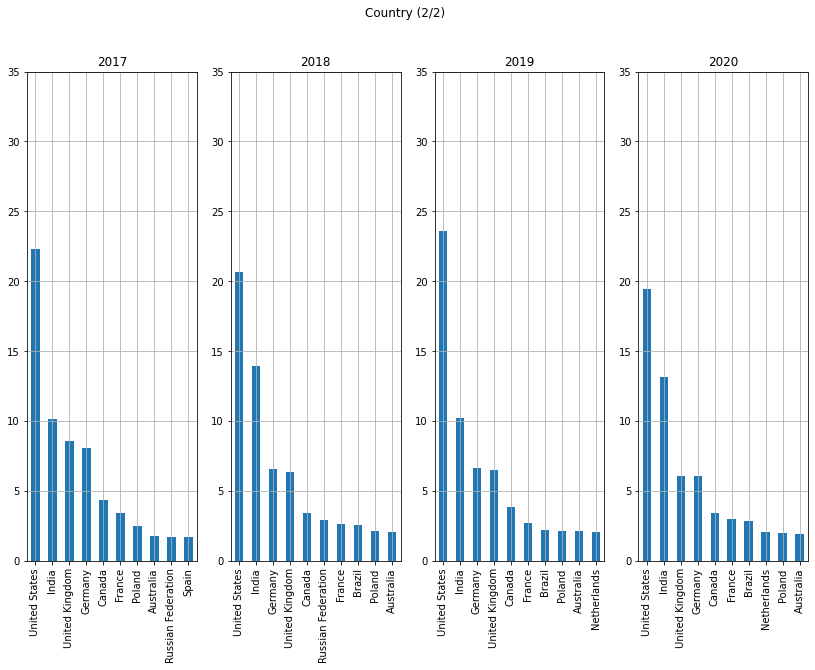

In [27]:
# Split in two to inprove readibility of labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Country (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

# Percentages are calculated with respect to the non-null answers
(count_vals_17[:10]/(num_rows_17 - df_17.Country.isnull().sum())*100).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 35])
ax1.grid()

(count_vals_18[:10]/(num_rows_18 - df_18.Country.isnull().sum())*100).plot(ax=ax2, kind="bar")
ax2.set_title("2018")
ax2.set_ylim([0, 35])
ax2.grid()

(count_vals_19[:10]/(num_rows_19 - df_19.Country.isnull().sum())*100).plot(ax=ax3, kind="bar");
ax3.set_title("2019")
ax3.set_ylim([0, 35])
ax3.grid();

(count_vals_20[:10]/(num_rows_20 - df_20.Country.isnull().sum())*100).plot(ax=ax4, kind="bar");
ax4.set_title("2020")
ax4.set_ylim([0, 35])
ax4.grid();

Now let's take a look at information about **gender**.

Note that the question about gender has changed through the years giving the respondent more options to better self-identify. This will be visible in the next plots.

In [28]:
# Extract columns with data about gender
# NOTE: title of the column containing gender information changed (slightly) from 2014 to 2020. 
# Also 2013 does not include this question
gend_vals_14 = df_14['What is your gender?'].value_counts() #2014
gend_vals_15 = df_15.Gender.value_counts() #2015
gend_vals_16 = df_16.gender.value_counts() #2016
gend_vals_17 = df_17.Gender.value_counts() #2017
gend_vals_18 = df_18.Gender.value_counts() #2018
gend_vals_19 = df_19.Gender.value_counts() #2019
gend_vals_20 = df_20.Gender.value_counts() #2020

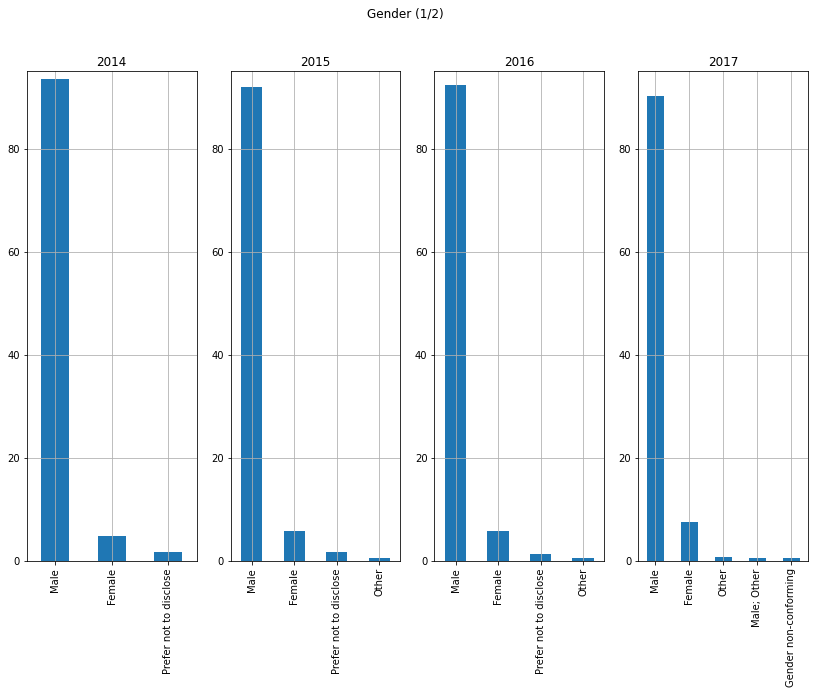

In [29]:
# Bar chart of the proportion of the top 5 values for the individuals in gend_vals
# Splitting to improve readability of labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Gender (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

# Percentages are calculated with respect to the non-null answers
(gend_vals_14[:5]/(num_rows_14 - df_14['What is your gender?'].isnull().sum())*100).plot(ax=ax1, kind="bar")
ax1.set_title("2014")
ax1.set_ylim([0, 95])
ax1.grid()

(gend_vals_15[:5]/(num_rows_15 - df_15.Gender.isnull().sum())*100).plot(ax=ax2, kind="bar")
ax2.set_title("2015")
ax2.set_ylim([0, 95])
ax2.grid()

(gend_vals_16[:5]/(num_rows_16 - df_16.gender.isnull().sum())*100).plot(ax=ax3, kind="bar")
ax3.set_title("2016")
ax3.set_ylim([0, 95])
ax3.grid()

(gend_vals_17[:5]/(num_rows_17 - df_17.Gender.isnull().sum())*100).plot(ax=ax4, kind="bar")
ax4.set_title("2017")
ax4.set_ylim([0, 95])
ax4.grid()

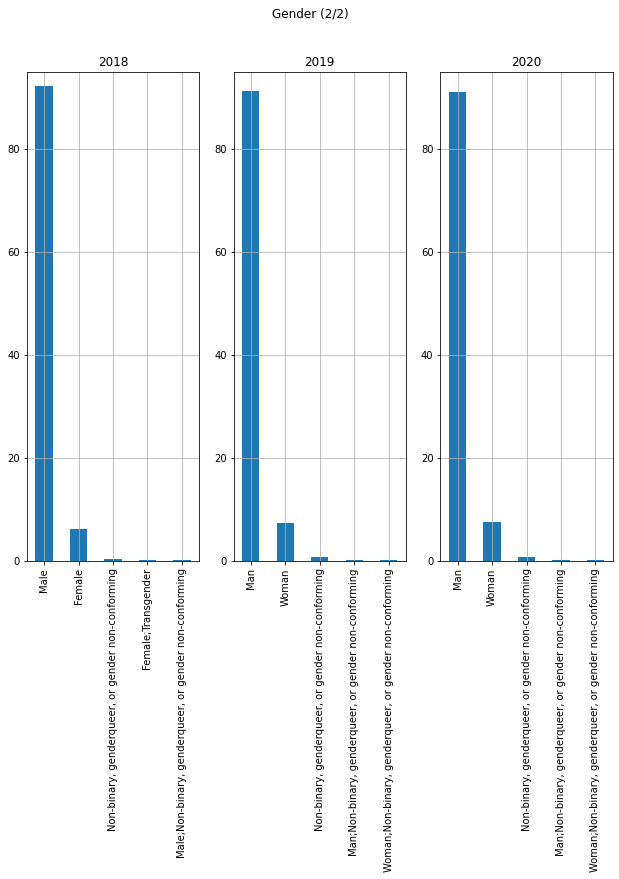

In [30]:
# Splitting to improve readability of labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Gender (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(10.5)

# Percentages are calculated with respect to the non-null answers
(gend_vals_18[:5]/(num_rows_18 - df_18.Gender.isnull().sum())*100).plot(ax=ax1, kind="bar");
ax1.set_title("2018")
ax1.set_ylim([0, 95])
ax1.grid();

(gend_vals_19[:5]/(num_rows_19 - df_19.Gender.isnull().sum())*100).plot(ax=ax2, kind="bar")
ax2.set_title("2019")
ax2.set_ylim([0, 95])
ax2.grid()

(gend_vals_20[:5]/(num_rows_20 - df_20.Gender.isnull().sum())*100).plot(ax=ax3, kind="bar");
ax3.set_title("2020")
ax3.set_ylim([0, 95])
ax3.grid();

The fact that the majority of respondents are men is clearly visible here. For the sake of simplicity we can focus on the Male/Female answer, aggregate data and show percentages over the years.

In [31]:
perc_male = []
perc_female = []

perc_male.append((gend_vals_14[0]/(num_rows_14 - df_14['What is your gender?'].isnull().sum()))*100)
perc_male.append((gend_vals_15[0]/(num_rows_15 - df_15.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_16[0]/(num_rows_16 - df_16.gender.isnull().sum()))*100)
perc_male.append((gend_vals_17[0]/(num_rows_17 - df_17.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_18[0]/(num_rows_18 - df_18.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_19[0]/(num_rows_19 - df_19.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_20[0]/(num_rows_20 - df_20.Gender.isnull().sum()))*100)

perc_female.append((gend_vals_14[1]/(num_rows_14 - df_14['What is your gender?'].isnull().sum()))*100)
perc_female.append((gend_vals_15[1]/(num_rows_15 - df_15.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_16[1]/(num_rows_16 - df_16.gender.isnull().sum()))*100)
perc_female.append((gend_vals_17[1]/(num_rows_17 - df_17.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_18[1]/(num_rows_18 - df_18.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_19[1]/(num_rows_19 - df_19.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_20[1]/(num_rows_20 - df_20.Gender.isnull().sum()))*100)

In [32]:
df_gend_perc = pd.DataFrame({'Male': perc_male,
                             'Female': perc_female},
                              index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [33]:
df_gend_perc.head(7)

,Male,Female
2014,93.438606,4.791723
2015,92.056401,5.748912
2016,92.447739,5.760443
2017,90.133250,7.418609
2018,92.227272,6.243311
2019,91.233637,7.428050
2020,91.012125,7.603299


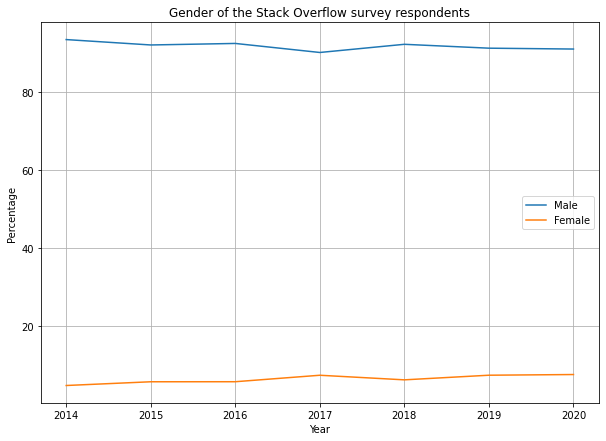

In [34]:
# Plot
df_gend_perc.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Percentage',
                  title='Gender of the Stack Overflow survey respondents');

Judging from the plot there seem to be trends in the data, and they will be further analysed in the Modeling section

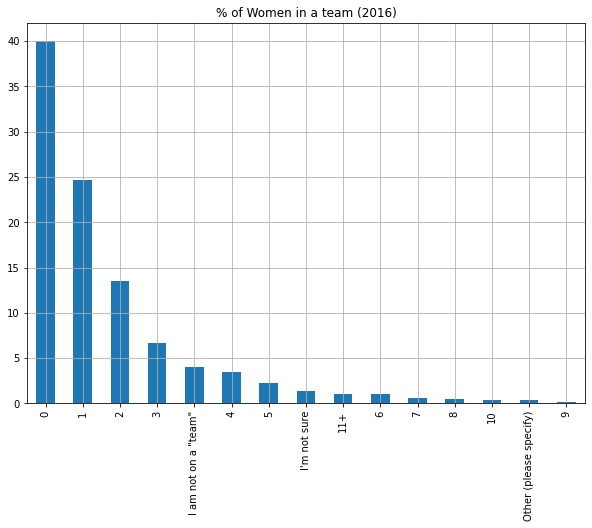

In [35]:
# As an additional point, note that 2016 included a specific "women_on_teams" columns
wot_16 = df_16.women_on_team.value_counts()

(wot_16*100/(num_rows_16 - df_16.women_on_team.isnull().sum())).plot(kind="bar", grid=True, figsize = (10,7),
                                                                 title='% of Women in a team (2016)');

Finally, let's take a look at **ethnicity**

In [36]:
# Extract columns with data about ethnicity
# NOTE: title of the column containing ethnicity information changed from 2017 to 2020. 
# Also 2013/17 do not include information about ethnicity in results
ethn_vals_17 = df_17.Race.value_counts() #2017
ethn_vals_18 = df_18.RaceEthnicity.value_counts() #2018
ethn_vals_19 = df_19.Ethnicity.value_counts() #2019
ethn_vals_20 = df_20.Ethnicity.value_counts() #2020

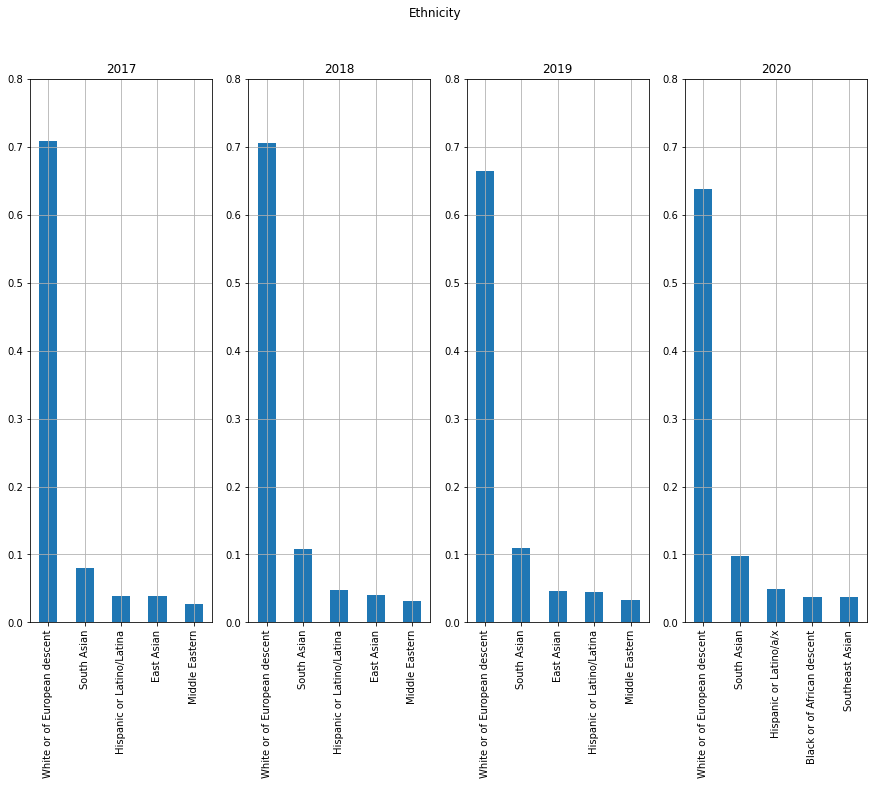

In [37]:
# Bar chart of the proportion of the top 5 values for the individuals in ethn_vals
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Ethnicity")
fig.set_figheight(10) 
fig.set_figwidth(15)

# Percentages are calculated with respect to the non-null answers
(ethn_vals_17[:5]/(num_rows_17 - df_17.Race.isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 0.80])
ax1.grid()

(ethn_vals_18[:5]/(num_rows_18 - df_18.RaceEthnicity.isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2018")
ax2.set_ylim([0, 0.80])
ax2.grid()

(ethn_vals_19[:5]/(num_rows_19 - df_19.Ethnicity.isnull().sum())).plot(ax=ax3, kind="bar")
ax3.set_title("2019")
ax3.set_ylim([0, 0.80])
ax3.grid()

(ethn_vals_20[:5]/(num_rows_20 - df_20.Ethnicity.isnull().sum())).plot(ax=ax4, kind="bar")
ax4.set_title("2020")
ax4.set_ylim([0, 0.80])
ax4.grid()

For this category too, there is a clear majority identifiable in the answers.

### 4 - Modeling

The level of unbalance identifiable in the demographic data led me try to provide some forecast, to see when, in the foreseeable future, things might be subject to change. From a **data science process** perspective, this section will cover mostly the _model_ and _visualize_ steps.

I focused on the **gender** analyis, and given the behaviour visible in the plots, I opted for a simple linear fit.

In [38]:
# First order polynomial to fit data
coefficients_male, residuals_male, _,_,_ = np.polyfit(df_gend_perc.index.array,df_gend_perc.Male,1, full=True)
coefficients_female, residuals_female, _,_,_ = np.polyfit(df_gend_perc.index.array,df_gend_perc.Female,1, full=True)

# Accuracy of the linear predictors
# mse = mean square error
# nrmse = normalised root mean square error
mse_male = residuals_male[0]/(len(df_gend_perc.index))
nrmse_male = np.sqrt(mse_male)/(df_gend_perc.Male.max() - df_gend_perc.Male.min())
mse_female = residuals_female[0]/(len(df_gend_perc.index))
nrmse_female = np.sqrt(mse_female)/(df_gend_perc.Female.max() - df_gend_perc.Female.min())

print('Slope - Male: ' + str(coefficients_male[0]) + '; Female: ' + str(coefficients_female[0]))
print('NRMSE - Male: ' + str(nrmse_male)+ '; Female: ' + str(nrmse_female))


Slope - Male: -0.32662282091561523; Female: 0.43842390740045456
NRMSE - Male: 0.23111499776360084; Female: 0.16999092555397122


Judging from the NRMSE, the linear predictors are not bad, and so I used them and extended the trend lines into the future.

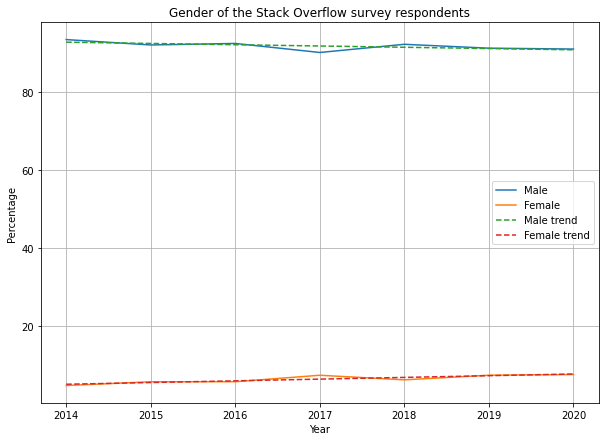

In [39]:
# Plot, including trendlines
ax = df_gend_perc.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Percentage',
                  title='Gender of the Stack Overflow survey respondents');

# Extrapolate linear models
xx = [x for x in (df_gend_perc.index.array)]

yy_m = [coefficients_male[0]*x + coefficients_male[1] for x in (df_gend_perc.index.array)]
yy_f = [coefficients_female[0]*x + coefficients_female[1] for x in (df_gend_perc.index.array)]


ax.plot(xx,yy_m,'--')
ax.plot(xx,yy_f,'--')
ax.legend(['Male', 'Female', 'Male trend', 'Female trend']);

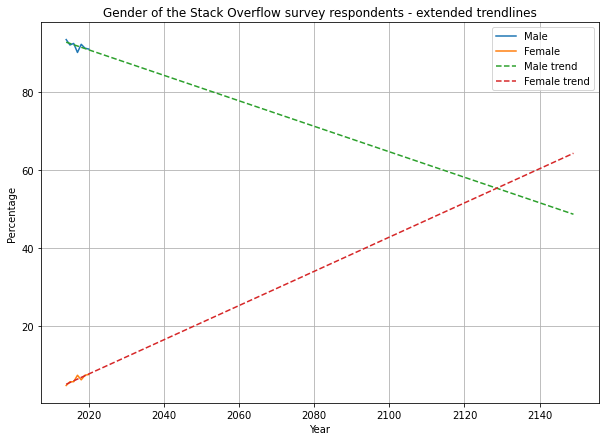

In [40]:
# Plot, with extended trendlines
ax = df_gend_perc.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Percentage',
                  title='Gender of the Stack Overflow survey respondents - extended trendlines');

# Extend predictions towards a year with an even distribution, and add 5 years
x_ext = int((50 - coefficients_male[1])/coefficients_male[0]) + 5

xx.append(x_ext)
yy_m.append(coefficients_male[0]*x_ext + coefficients_male[1])
yy_f.append(coefficients_female[0]*x_ext + coefficients_female[1])


ax.plot(xx,yy_m,'--')
ax.plot(xx,yy_f,'--')
ax.grid(b=True)
ax.legend(['Male', 'Female', 'Male trend', 'Female trend']);

### 5 - Evaluation

The intent of the analysis was to look for patterns in the characteristics of a reference population of SW developers and eventually foresee an evolution based on them.

Of all the categories provided through the StackOverflow data survey, I found the gender distribution of the respondents most striking because:

* A clear pattern is visible there, with a strong majority of th respondents being men;
* The data can be well approximated with a trend line, showing that a rate of change is present that moves towards a more even ditribution;
* Extending this trends into the future shows that, at the current pace, the reaching of a state where genders are equally distributed within the workforce would require more or less another century.

The last point particularly seems at odds with the reputation of the SW world to be one where things can change quickly. 

###  6 - Deployment

Besides this noetbook, I published some of the findings in a **Medium story** available [here](https://michelangelo-russo.medium.com/do-things-really-change-in-software-2d5f2c7c9244).

The story doesn't cover all the findings and analyses decribed in the notebook: I decided for it to focus on some of the things that I thought could be more easily expected (like the distribution of languages used/wanted by developers) and then on the findings about the gender distribution.
